<a href="https://colab.research.google.com/github/divya-tiwari-13/quora-question-pairs/blob/main/bow_with_basic_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')


In [4]:
dff = pd.read_csv('/content/train.csv',engine='python')

In [5]:
dff.shape

(404290, 6)

In [6]:
dff.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [7]:
df = dff.sample(30000,random_state = 2)
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
ques_df= df[['question1','question2']]
ques_df

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...
...,...,...
243932,What are some good web scraping tutorials?,What are some good web scraping programs?
91980,Can I apply for internet banking in SBI withou...,I have internet banking kit of SBI but it's no...
266955,How much HE laundry detergent do you use in a ...,Can I use regular Dawn dishsoap in my dishwash...
71112,What is the best way to understand and learn m...,What are some of the best ways to learn math?


is_duplicate
0    19013
1    10987
Name: count, dtype: int64
is_duplicate
0    63.376667
1    36.623333
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

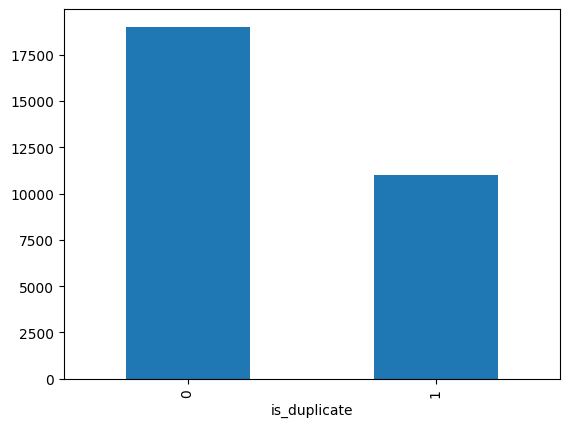

In [10]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [11]:
# Repeated Quesitons

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x= qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 55299
Number of questions getting repeated 3480


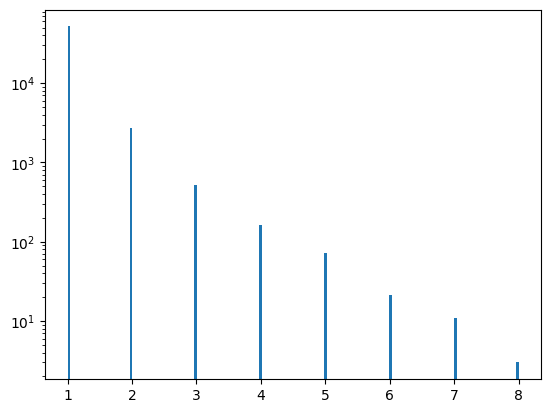

In [12]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

## Feature Engineering
####Features which are included
1. q1 len --> char length of q1
2. q2 len --> char length of q2
3. q1 words --> # words in q1
4. q2 words --> # words in q2
5. Words Common --> # of common unique words
6. Words Total --> Total # wwords in q1 + total # of words in q2
7. words share --> Words common/ words total


In [13]:
# @title Length of character
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()


In [14]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50


In [15]:
# @title Length of words
df['q1_num_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

In [16]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9


In [17]:
# @title Common words
def common_words(row):
  q1 = set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
  q2 = set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
  return len(q1 & q2)

In [18]:
df['Word_common']= df.apply(common_words,axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,Word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3


In [19]:
# @title Total words
def total_words(row):
  q1 = set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
  q2 = set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
  return (len(q1) + len(q2))

In [20]:
df['total_words']= df.apply(total_words,axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,Word_common,total_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13


In [21]:
# @title Words share
df['words_share']= round(df['Word_common'] / df['total_words'],2)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,Word_common,total_words,words_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23


minimum characters 2
maximum characters 391
average characters 59


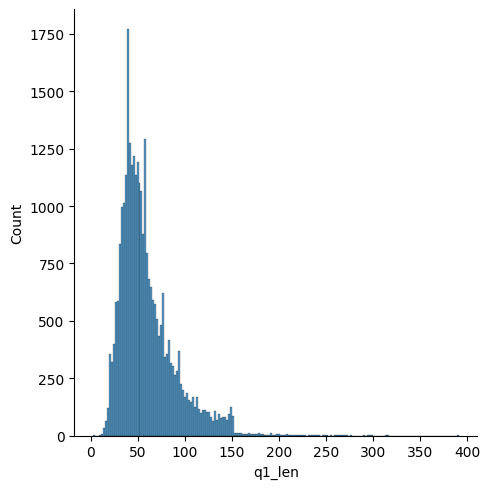

In [22]:
# @title Analysis of features
sns.displot(df['q1_len'])
print('minimum characters',df['q1_len'].min())
print('maximum characters',df['q1_len'].max())
print('average characters',int(df['q1_len'].mean()))

minimum characters 6
maximum characters 1151
average characters 60


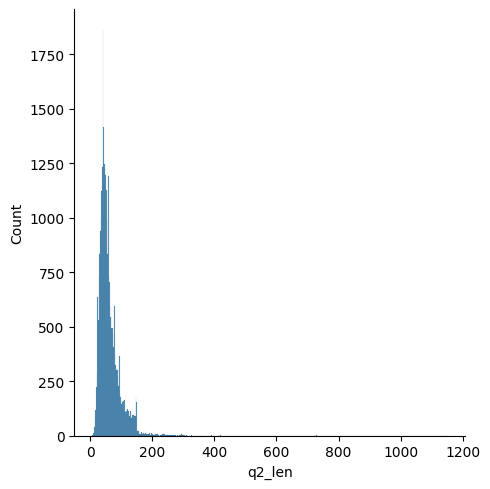

In [23]:
# @title Analysis of features
sns.displot(df['q2_len'])
print('minimum characters',df['q2_len'].min())
print('maximum characters',df['q2_len'].max())
print('average characters',int(df['q2_len'].mean()))

minimum words 1
maximum words 72
average num of words 10


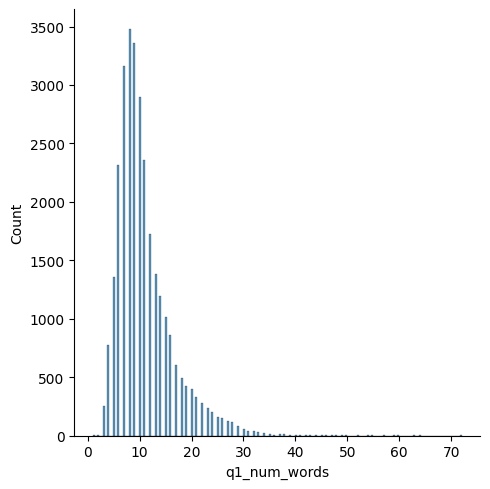

In [24]:
sns.displot(df['q1_num_words'])
print('minimum words',df['q1_num_words'].min())
print('maximum words',df['q1_num_words'].max())
print('average num of words',int(df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


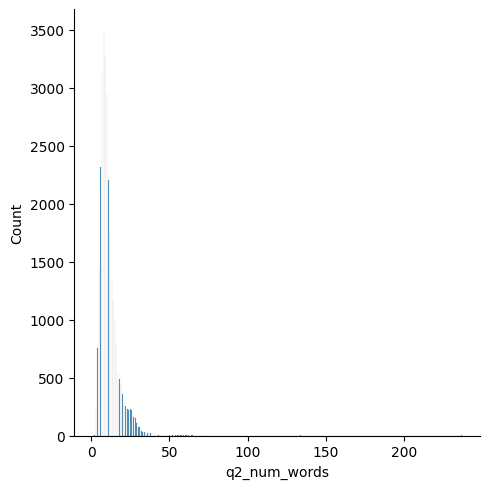

In [25]:
sns.displot(df['q2_num_words'])
print('minimum words',df['q2_num_words'].min())
print('maximum words',df['q2_num_words'].max())
print('average num of words',int(df['q2_num_words'].mean()))

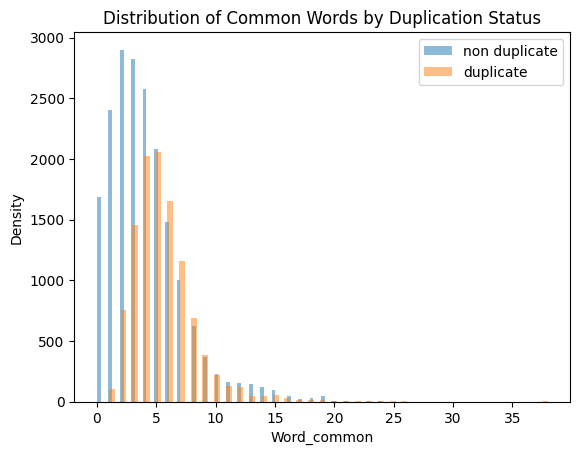

In [26]:
# @title Common Words
plt.hist(df[df['is_duplicate'] == 0]['Word_common'], label='non duplicate', alpha=0.5, bins=75)
plt.hist(df[df['is_duplicate'] == 1]['Word_common'], label='duplicate', alpha=0.5, bins=75)
plt.xlabel('Word_common')
plt.ylabel('Density')
plt.title('Distribution of Common Words by Duplication Status')
plt.legend()
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 398782 to 312470
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            30000 non-null  int64  
 1   qid1          30000 non-null  int64  
 2   qid2          30000 non-null  int64  
 3   question1     30000 non-null  object 
 4   question2     30000 non-null  object 
 5   is_duplicate  30000 non-null  int64  
 6   q1_len        30000 non-null  int64  
 7   q2_len        30000 non-null  int64  
 8   q1_num_words  30000 non-null  int64  
 9   q2_num_words  30000 non-null  int64  
 10  Word_common   30000 non-null  int64  
 11  total_words   30000 non-null  int64  
 12  words_share   30000 non-null  float64
dtypes: float64(1), int64(10), object(2)
memory usage: 3.2+ MB


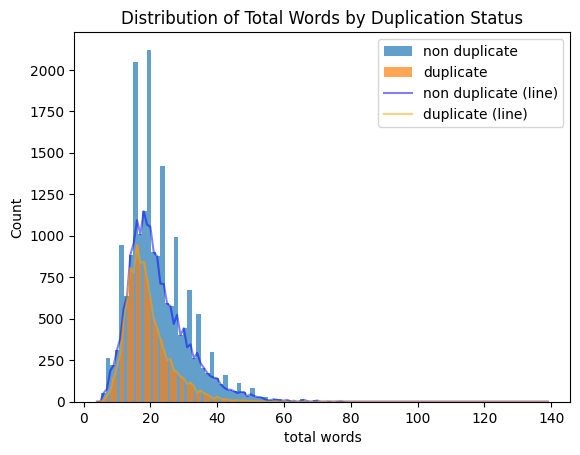

In [28]:
# @title total words
plt.hist(df[df['is_duplicate'] == 0]['total_words'], label='non duplicate', alpha=0.7, bins=100)
plt.hist(df[df['is_duplicate'] == 1]['total_words'], label='duplicate', alpha=0.7, bins=100)

# Calculate counts for each total word value for both duplicate and non-duplicate questions
total_words_counts = df.groupby(['total_words', 'is_duplicate']).size().unstack(fill_value=0)

# Plot line graph on the same axes
plt.plot(total_words_counts[0], label='non duplicate (line)',alpha = 0.5, color='blue')
plt.plot(total_words_counts[1], label='duplicate (line)',alpha = 0.5, color='orange')


plt.xlabel('total words')
plt.ylabel('Count')
plt.title('Distribution of Total Words by Duplication Status')
plt.legend()
plt.show()

In [29]:
ques_df = df[['question1','question2']]
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [30]:
final_df= df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,Word_common,total_words,words_share
398782,1,76,77,12,12,11,24,0.46
115086,0,49,57,12,15,7,23,0.30
327711,0,105,120,25,17,2,34,0.06
367788,0,59,146,12,30,0,32,0.00
151235,0,35,50,5,9,3,13,0.23


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
#merge texts
questions = list(ques_df['question1'].fillna('')) + list(ques_df['question2'].fillna(''))

cv = CountVectorizer(max_features = 3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [41]:
tempdf1 = pd.DataFrame(q1_arr, index = ques_df.index)
tempdf2 = pd.DataFrame(q2_arr, index = ques_df.index)
temp_df = pd.concat([tempdf1,tempdf2],axis=1)
temp_df.shape

(30000, 6000)

In [33]:
final_df = pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,Word_common,total_words,words_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,11,24,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,23,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,34,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,32,0.00,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,35,50,5,9,3,13,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
temp_df['is_duplicate'] = df['is_duplicate']

In [36]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
398782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
115086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
151235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size = 0.2,random_state = 1)


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7711666666666667

In [39]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7625

#Advanced Features
##1. Token Features
1. cwc_min: This is the ratio of the number of common words to the length of the smaller question
2. cwc_max: This is the ratio of the number of common words to the length of the larger question
3. csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
4. csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions
5. ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions
6. ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions
7. last_word_eq: 1 if the last word in the two questions is same, 0 otherwise
8. first_word_eq: 1 if the first word in the two questions is same, 0 otherwise
##2. Length Based Features
1. mean_len: Mean of the length of the two questions (number of words)
2. abs_len_diff: Absolute difference between the length of the two questions (number of words)
3. longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question
##3. Fuzzy Features
1. fuzz_ratio: fuzz_ratio score from fuzzywuzzy
2. fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy
3. token_sort_ratio: token_sort_ratio from fuzzywuzzy
4. token_set_ratio: token_set_ratio from fuzzywuzzy